# Задание 1

## Сгенерировать 3 датасета

In [1]:
from sklearn.datasets import make_classification

In [5]:
data1, data1_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=110)

In [33]:
data2, data2_y = make_classification(n_samples=1000, n_classes=4, n_features=4, n_redundant=0, n_clusters_per_class=1, flip_y=0.01, random_state=110)

In [24]:
data3, data3_y = make_classification(n_samples=100, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=110)

- n_samples - определяет общий размер сгенерированного набора данных.
- n_feature -  количество независимых переменных, которые содержатся в данных.
- n_class - то , на сколько классов будет разделен набор данных.
- n_redund - колличество ти призов которыеаки не будут иметь никакой информационной ценности и могут быть полезны для проверки алгоритмов относительно шумовых признаков.
- n_clusters_per_c - тояет, сколько внутренних групп точек будет сгенерировано для каждого класса.
- f - показываетляет, какая часть образцов будет иметь ошибочно присвоенные классы с целью создания шума и более сложной границы разделения классов.
- random_state: управляет генерацией псевдослучайных чисел, что позволяет воспроизводить одинаковые результаты при каждом запуске.

## Провести визуализацию

In [25]:
import matplotlib.pyplot as plt

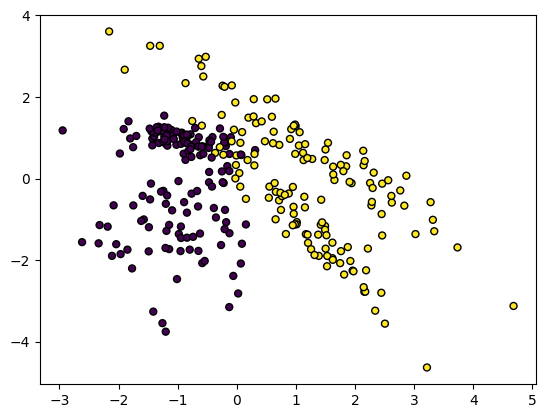

In [26]:
# как видит классификатор
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

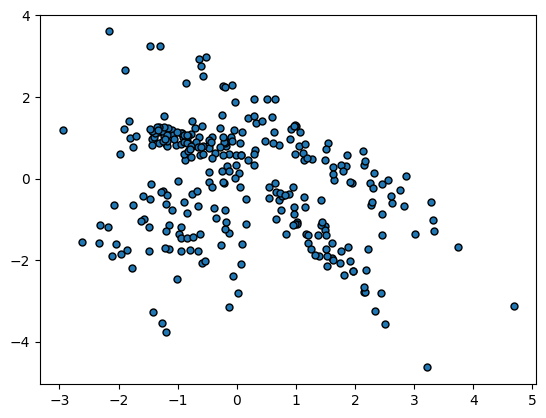

In [27]:
# как видит кластеризатор
plt.scatter(data1[:, 0], data1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

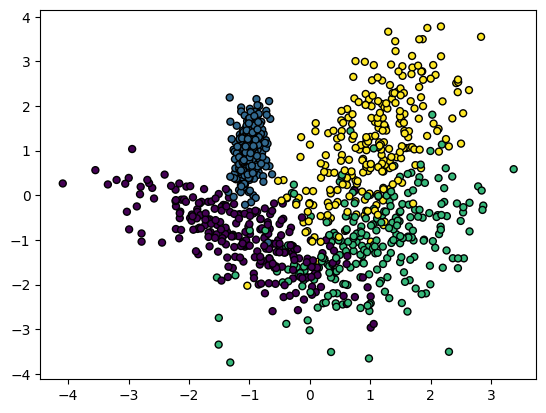

In [34]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

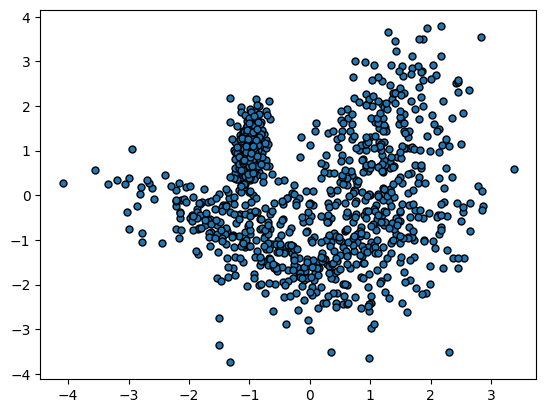

In [35]:
plt.scatter(data2[:, 0], data2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

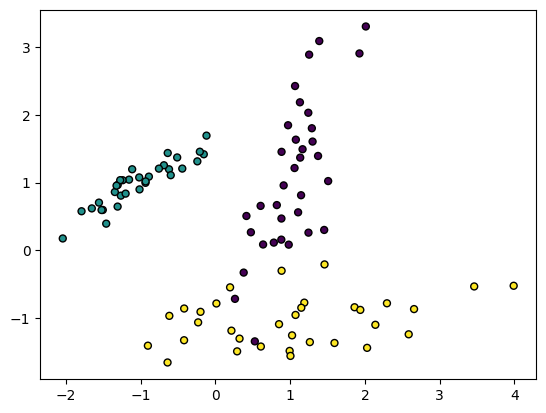

In [36]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

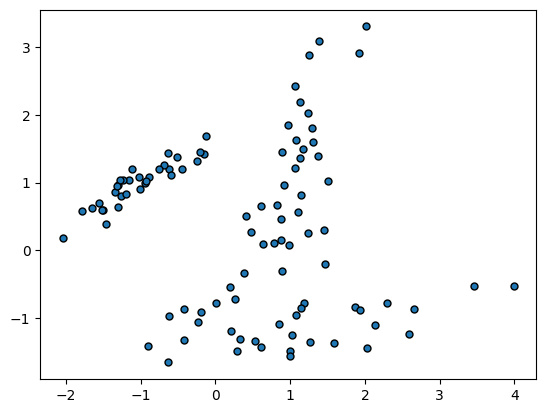

In [37]:
plt.scatter(data3[:, 0], data3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

## Провести кластеризацию. Для каждого метода подобрать гиперпараметры. Каждый метод оценить двумя внешними и двумя внутренними метриками

Воспользуемся алгоритмом KMeans

In [38]:
from sklearn.cluster import KMeans

In [40]:
kmeans1 = KMeans(2, n_init='auto').fit(data1)

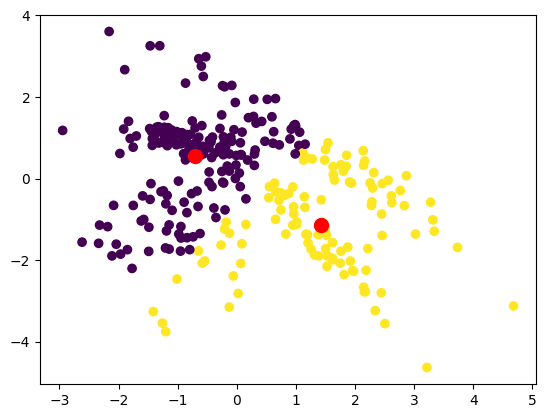

In [41]:
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [42]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, rand_score, fowlkes_mallows_score

In [43]:
# Внутренние метрики
print(silhouette_score(data1, kmeans1.labels_))
print(calinski_harabasz_score(data1, kmeans1.labels_))

# Внешние метрики
print(rand_score(kmeans1.labels_, data1_y))
print(fowlkes_mallows_score(kmeans1.labels_, data1_y))

0.4326994737052738
251.74479301922747
0.6339799331103679
0.6445597828011859


подберём оптимальное количество кластеров. Для этого используем метод Локтя

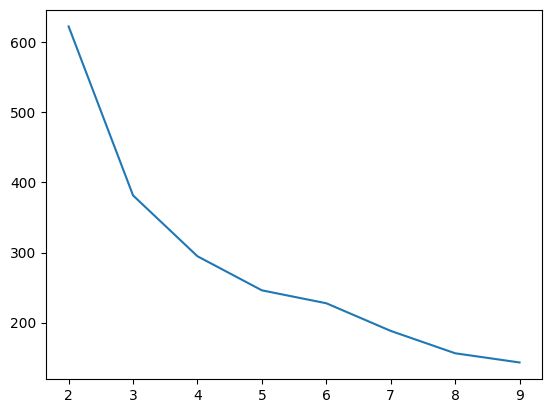

In [44]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data1)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

попробуем посмотреть ещё один метод. метод Силуэта

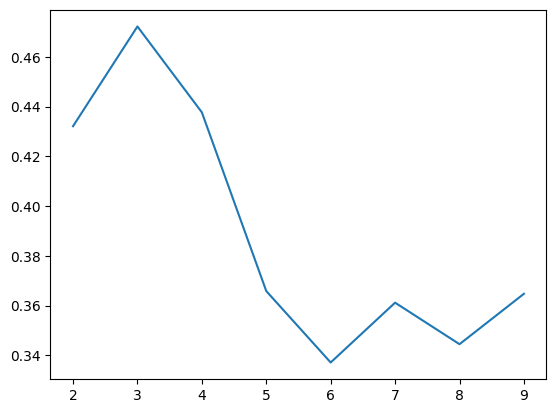

In [45]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

Итак оптимальное кол-во кластеров это 3. Зная это обучим модель 

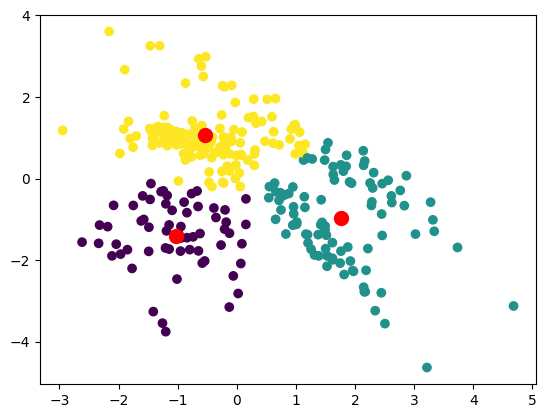

In [46]:
kmeans1 = KMeans(3, n_init='auto').fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

Оценим работу

In [47]:
# Внутренние метрики
print(silhouette_score(data1, kmeans1.labels_))
print(calinski_harabasz_score(data1, kmeans1.labels_))

# Внешние метрики
print(rand_score(kmeans1.labels_, data1_y))
print(fowlkes_mallows_score(kmeans1.labels_, data1_y))

0.47194565165276603
298.6853345886673
0.6492976588628763
0.603098962959408


Теперь воспользуемся моделью AffinityPropagation

In [48]:
from sklearn.cluster import AffinityPropagation

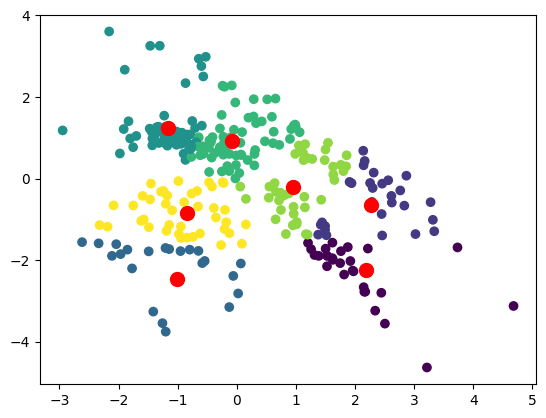

In [49]:
clustering1 = AffinityPropagation(preference=-42).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [50]:
# Внутренние метрики
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

# Внешние метрики
print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.33160227310328466
231.72847770374003
0.5888517279821628
0.43873620964248644


In [51]:
from sklearn.model_selection import GridSearchCV

In [65]:
aff_prop = AffinityPropagation(random_state=42)
clustering_params = {'preference': list(range(-50, 40))}

In [70]:
Tree_best_grid = GridSearchCV(aff_prop,
                              clustering_params,
                              cv=5,
                              scoring='rand_score',
                              verbose=True).fit(data1, data1_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_a

In [71]:
Tree_best_grid.best_params_

{'preference': -49}

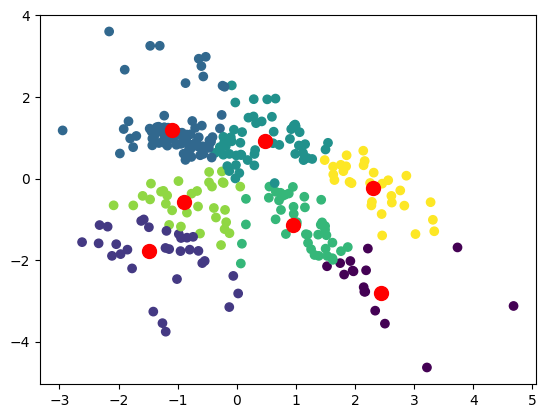

In [72]:
clustering1 = AffinityPropagation(preference=-49).fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)
plt.scatter(clustering1.cluster_centers_[:,0], clustering1.cluster_centers_[:,1], s=100, c='red')

In [73]:
# Внутренние метрики
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

# Внешние метрики
print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.36678119516006247
242.51283191373108
0.6016499442586399
0.4653602086867991


Теперь используем DB-SCAN

In [74]:
from sklearn.cluster import DBSCAN
import numpy as np

[-1  0]


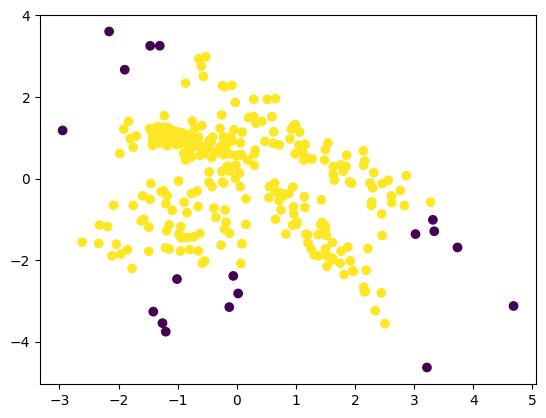

In [75]:
dbscan1 = DBSCAN().fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [77]:
# Внутренние метрики
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

# Внешние метрики
print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

-0.3049716754307235
7.816551910236337
0.5215161649944259
0.5817685163143381


[-1  0  1  2  3  4  5]


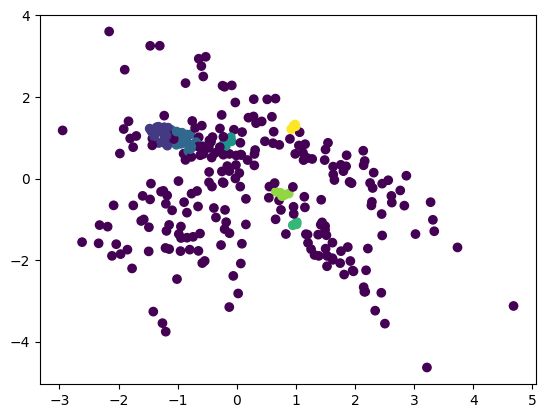

In [76]:
dbscan1 = DBSCAN(eps=0.1, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [78]:
# Внутренние метрики
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

# Внешние метрики
print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

-0.3049716754307235
7.816551910236337
0.5215161649944259
0.5817685163143381


In [79]:
from sklearn.neighbors import NearestNeighbors

In [80]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data1)
distances, indices = nbrs.kneighbors(data1)

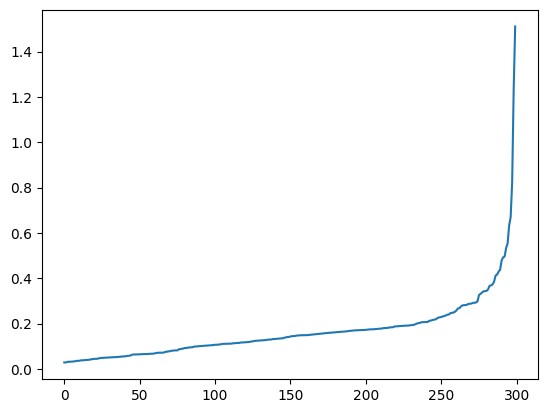

In [81]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5]


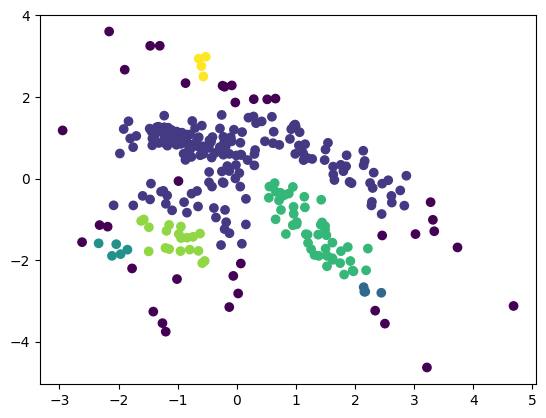

In [82]:
dbscan1 = DBSCAN(eps=0.35, min_samples=4).fit(data1)
print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

In [83]:
# Внутренние метрики
print(silhouette_score(data1, dbscan1.labels_))
print(calinski_harabasz_score(data1, dbscan1.labels_))

# Внешние метрики
print(rand_score(dbscan1.labels_, data1_y))
print(fowlkes_mallows_score(dbscan1.labels_, data1_y))

0.07574821496511006
25.862176442124007
0.5492084726867336
0.5089764296704711


Теперь используем GaussianMixture

In [84]:
from sklearn.mixture import GaussianMixture

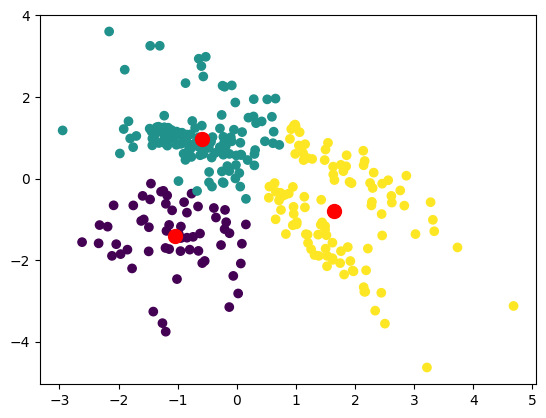

In [88]:
gm1 = GaussianMixture(n_components=3).fit(data1)

с = gm1.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c=с)
plt.scatter(gm1.means_[:,0], gm1.means_[:,1], s=100, c='red')

In [90]:
# Внутренние метрики
print(silhouette_score(data1, с))
print(calinski_harabasz_score(data1, с))

# Внешние метрики
print(rand_score(с, data1_y))
print(fowlkes_mallows_score(с, data1_y))

0.4621198229572218
280.18791054475736
0.6802898550724638
0.6374080506749087


Воспользуемся иерархической кластеризацией

In [91]:
from scipy.cluster import hierarchy

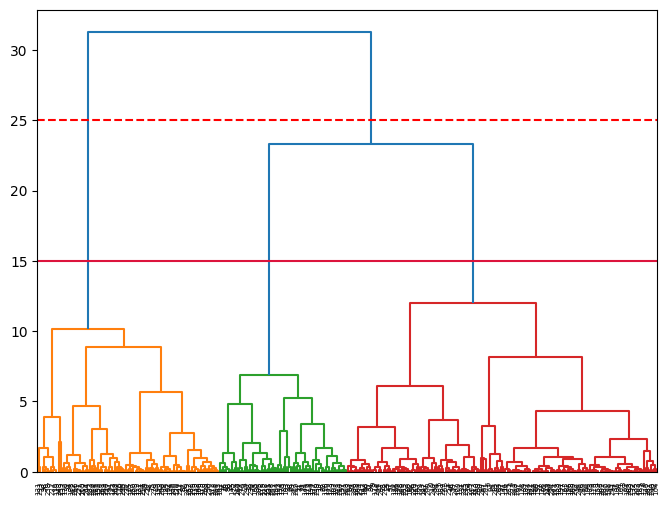

In [92]:
clusters1 = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters1)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

In [93]:
from sklearn.cluster import AgglomerativeClustering

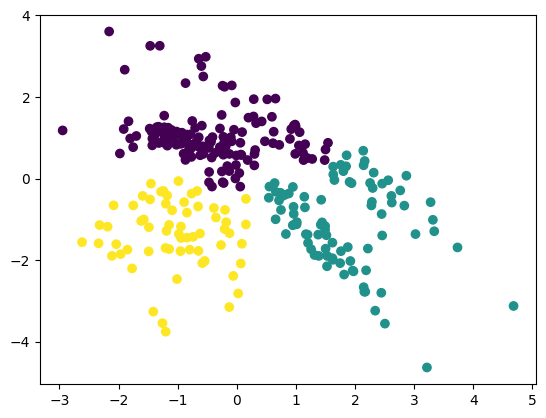

In [94]:
clustering1 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=clustering1.labels_)

In [95]:
# Внутренние метрики
print(silhouette_score(data1, clustering1.labels_))
print(calinski_harabasz_score(data1, clustering1.labels_))

# Внешние метрики
print(rand_score(clustering1.labels_, data1_y))
print(fowlkes_mallows_score(clustering1.labels_, data1_y))

0.4645049678610273
292.45081304581856
0.6335340022296544
0.586883905829729


Попробуем карты Кохонена

In [96]:
!pip install sklearn_som


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
!pip install --upgrade pip

  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\Sovano\Desktop\ML\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [141]:
from sklearn_som.som import SOM

In [154]:
som1 = SOM(m=2, n=2, dim=2)
som1.fit(data1)

In [155]:
predictions1 = som1.predict(data1)

In [156]:
# Внутренние метрики
print(silhouette_score(data1, predictions1))
print(calinski_harabasz_score(data1, predictions1))

# Внешние метрики
print(rand_score(predictions1, data1_y))
print(fowlkes_mallows_score(predictions1, data1_y))

0.3678997677287356
256.9339683122511
0.6805351170568562
0.6105591825399499


Теперь проделаем всё это для второго набора данных

In [157]:
kmeans2 = KMeans(4, n_init='auto').fit(data2)

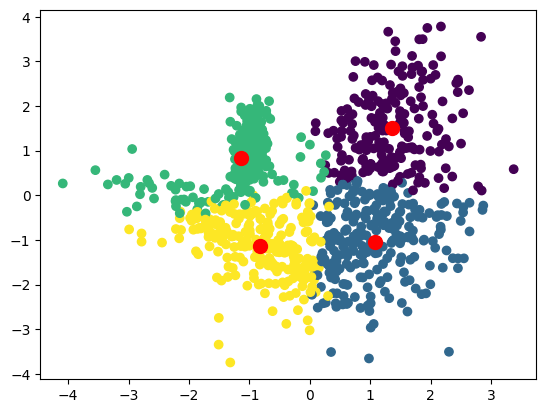

In [158]:
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [159]:
# Внутренние метрики
print(silhouette_score(data2, kmeans2.labels_))
print(calinski_harabasz_score(data2, kmeans2.labels_))

# Внешние метрики
print(rand_score(kmeans2.labels_, data2_y))
print(fowlkes_mallows_score(kmeans2.labels_, data2_y))

0.2166789268625209
291.3567059372102
0.8311631631631632
0.6648959885417797


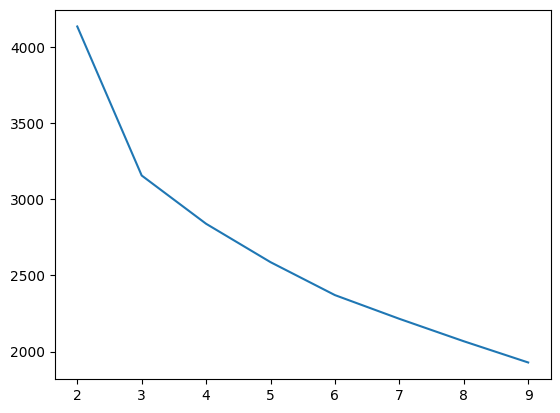

In [160]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

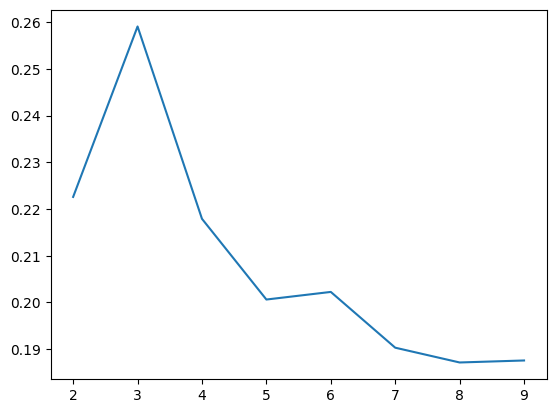

In [161]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

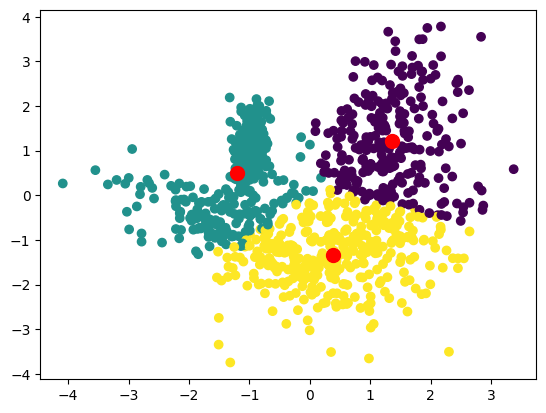

In [162]:
kmeans2 = KMeans(3, n_init='auto').fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [163]:
# Внутренние метрики
print(silhouette_score(data2, kmeans2.labels_))
print(calinski_harabasz_score(data2, kmeans2.labels_))

# Внешние метрики
print(rand_score(kmeans2.labels_, data2_y))
print(fowlkes_mallows_score(kmeans2.labels_, data2_y))

0.25915457736843506
350.1776995953165
0.7543463463463463
0.592798360265845


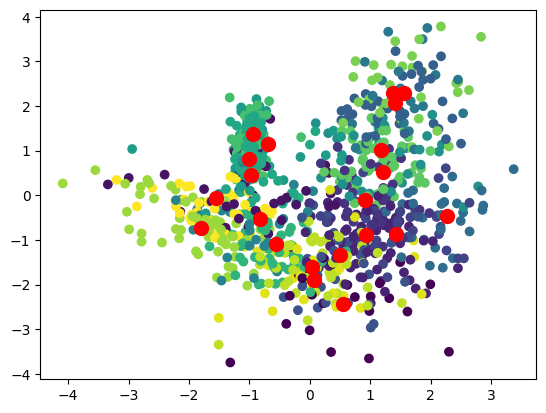

In [164]:
clustering2 = AffinityPropagation(preference=-42).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

In [165]:
# Внутренние метрики
print(silhouette_score(data2, clustering2.labels_))
print(calinski_harabasz_score(data2, clustering2.labels_))

# Внешние метрики
print(rand_score(clustering2.labels_, data2_y))
print(fowlkes_mallows_score(clustering2.labels_, data2_y))

0.17506388802059125
152.7718061912537
0.7711651651651652
0.32013198269619925


In [166]:
aff_prop = AffinityPropagation(random_state=42)
clustering_params = {'preference': list(range(-50, 40))}

In [167]:
Tree_best_grid = GridSearchCV(aff_prop,
                              clustering_params,
                              cv=5,
                              scoring='rand_score',
                              verbose=True).fit(data2, data2_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [168]:
Tree_best_grid.best_params_

{'preference': -43}

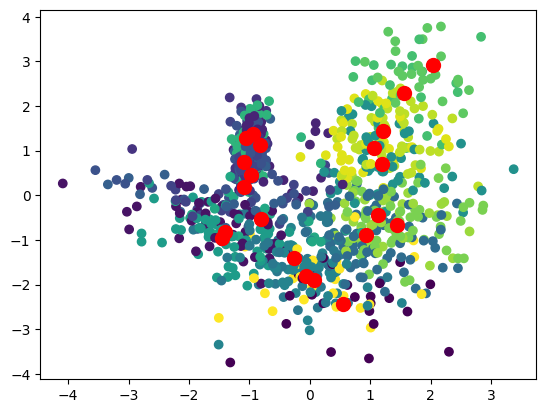

In [169]:
clustering2 = AffinityPropagation(preference=-43).fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)
plt.scatter(clustering2.cluster_centers_[:,0], clustering2.cluster_centers_[:,1], s=100, c='red')

In [170]:
# Внутренние метрики
print(silhouette_score(data2, clustering2.labels_))
print(calinski_harabasz_score(data2, clustering2.labels_))

# Внешние метрики
print(rand_score(clustering2.labels_, data2_y))
print(fowlkes_mallows_score(clustering2.labels_, data2_y))

0.17499365781003035
152.06813796699754
0.7685765765765766
0.3054700316367017


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


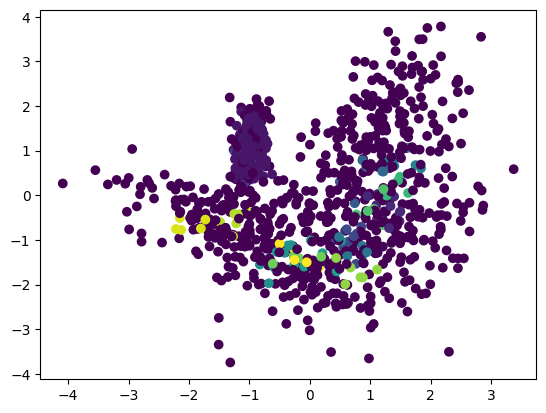

In [171]:
dbscan2 = DBSCAN().fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [172]:
# Внутренние метрики
print(silhouette_score(data2, dbscan2.labels_))
print(calinski_harabasz_score(data2, dbscan2.labels_))

# Внешние метрики
print(rand_score(dbscan2.labels_, data2_y))
print(fowlkes_mallows_score(dbscan2.labels_, data2_y))

-0.35429855459261433
7.984594309950216
0.5438698698698698
0.4614581876251503


[-1]


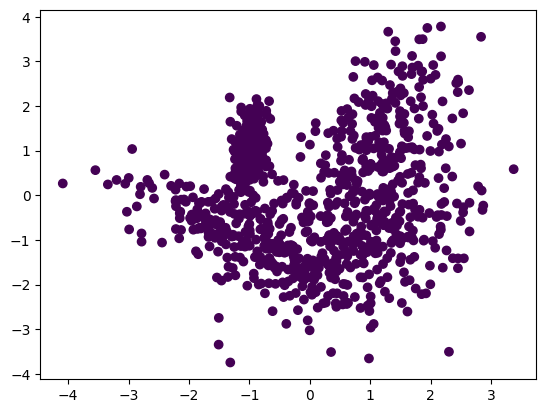

In [173]:
dbscan2 = DBSCAN(eps=0.1, min_samples=4).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [175]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data2)
distances, indices = nbrs.kneighbors(data2)

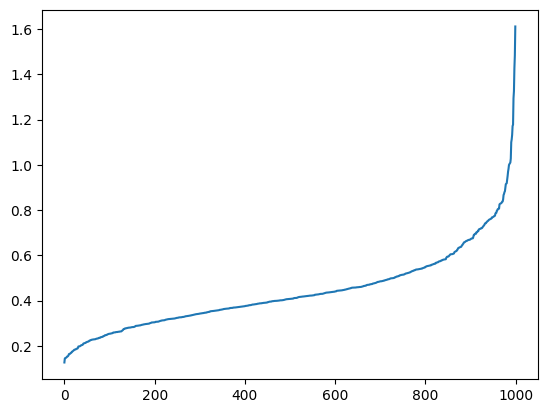

In [176]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


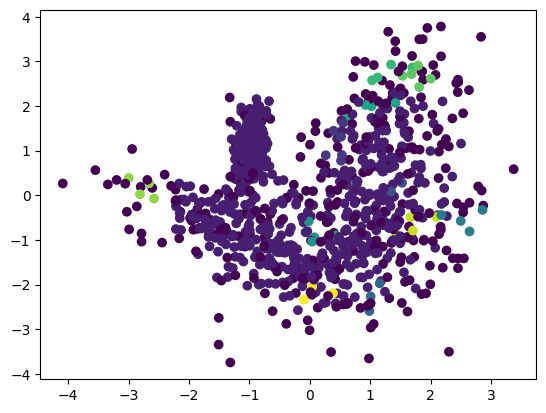

In [177]:
dbscan2 = DBSCAN(eps=0.65, min_samples=4).fit(data2)
print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

In [178]:
# Внутренние метрики
print(silhouette_score(data2, dbscan2.labels_))
print(calinski_harabasz_score(data2, dbscan2.labels_))

# Внешние метрики
print(rand_score(dbscan2.labels_, data2_y))
print(fowlkes_mallows_score(dbscan2.labels_, data2_y))

-0.3351360214931923
6.509582980644269
0.5137637637637638
0.388228879400061


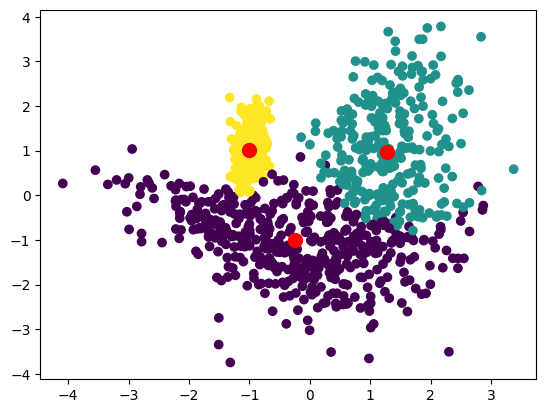

In [179]:
gm2 = GaussianMixture(n_components=3).fit(data2)

с = gm2.predict(data2)

plt.scatter(data2[:,0], data2[:,1], c=с)
plt.scatter(gm2.means_[:,0], gm2.means_[:,1], s=100, c='red')

In [180]:
# Внутренние метрики
print(silhouette_score(data2, с))
print(calinski_harabasz_score(data2, с))

# Внешние метрики
print(rand_score(с, data2_y))
print(fowlkes_mallows_score(с, data2_y))

0.20071298016058167
270.7110726493177
0.7866346346346347
0.6646548152390656


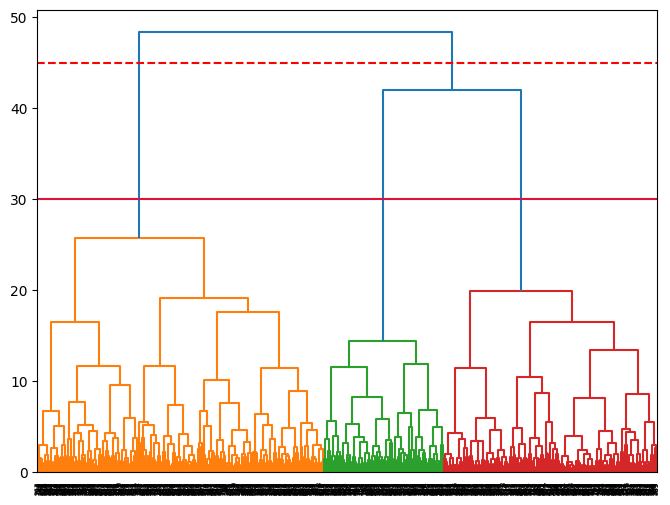

In [182]:
clusters2 = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters2)
plt.axhline(45, color='red', linestyle='--');
plt.axhline(30, color='crimson');

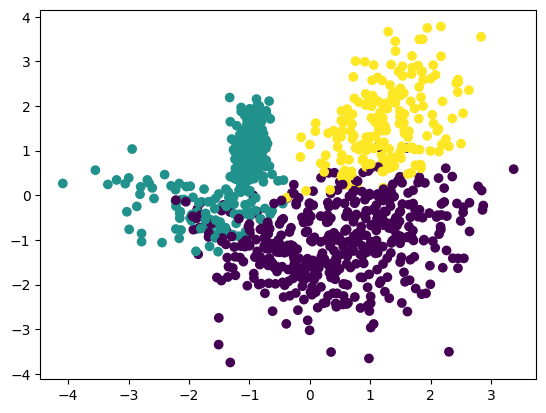

In [183]:
clustering2 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=clustering2.labels_)

In [184]:
# Внутренние метрики
print(silhouette_score(data2, clustering2.labels_))
print(calinski_harabasz_score(data2, clustering2.labels_))

# Внешние метрики
print(rand_score(clustering2.labels_, data2_y))
print(fowlkes_mallows_score(clustering2.labels_, data2_y))

0.23413288148366235
308.88319633394923
0.7588888888888888
0.6216172616515572


In [220]:
som2 = SOM(m=3, n=1, dim=4)
som2.fit(data2)

In [221]:
predictions2 = som2.predict(data2)

In [222]:
# Внутренние метрики
print(silhouette_score(data2, predictions2))
print(calinski_harabasz_score(data2, predictions2))

# Внешние метрики
print(rand_score(predictions2, data2_y))
print(fowlkes_mallows_score(predictions2, data2_y))

0.24264030829575403
322.58266802092703
0.7774174174174174
0.6340901317056684


Проверим модели на 3 датасете 

In [223]:
kmeans3 = KMeans(3, n_init='auto').fit(data3)

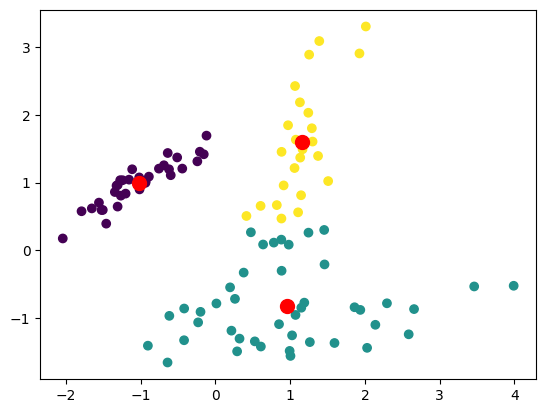

In [224]:
plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')

In [225]:
# Внутренние метрики
print(silhouette_score(data3, kmeans3.labels_))
print(calinski_harabasz_score(data3, kmeans3.labels_))

# Внешние метрики
print(rand_score(kmeans3.labels_, data3_y))
print(fowlkes_mallows_score(kmeans3.labels_, data3_y))

0.5054663105653111
107.3966568712194
0.8848484848484849
0.8288237164677318


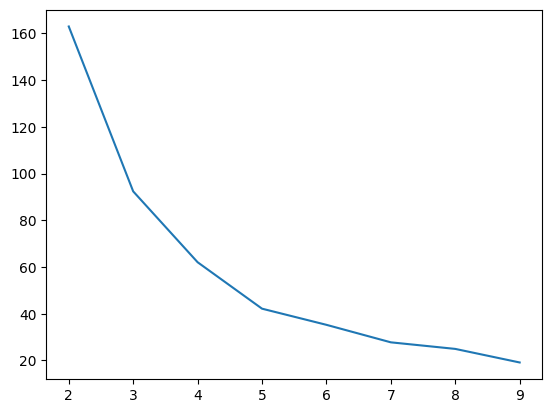

In [226]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

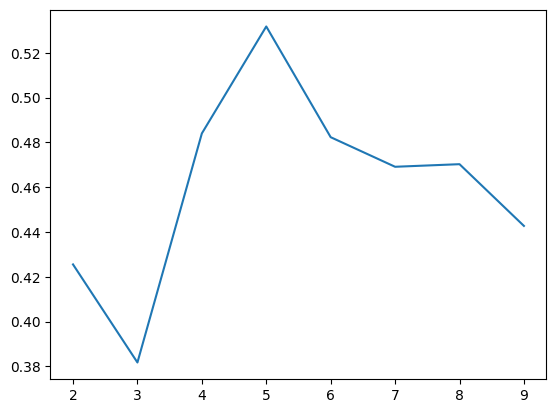

In [227]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

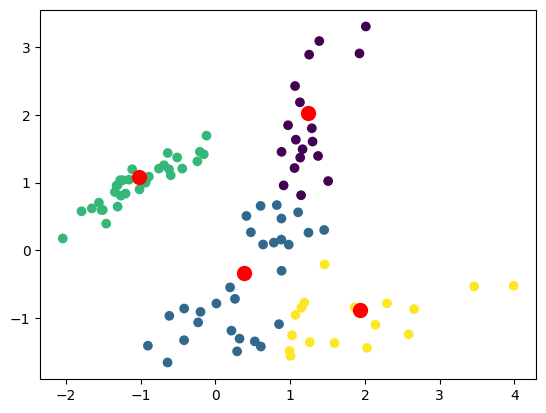

In [228]:
clustering3 = AffinityPropagation(preference=-42).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

In [229]:
# Внутренние метрики
print(silhouette_score(data3, clustering3.labels_))
print(calinski_harabasz_score(data3, clustering3.labels_))

# Внешние метрики
print(rand_score(clustering3.labels_, data3_y))
print(fowlkes_mallows_score(clustering3.labels_, data3_y))

0.48385931564964824
112.80542459694375
0.8424242424242424
0.7361735902207902


In [230]:
aff_prop = AffinityPropagation(random_state=42)
clustering_params = {'preference': list(range(-50, 40))}

In [231]:
Tree_best_grid = GridSearchCV(aff_prop,
                              clustering_params,
                              cv=5,
                              scoring='rand_score',
                              verbose=True).fit(data3, data3_y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [232]:
Tree_best_grid.best_params_

{'preference': -47}

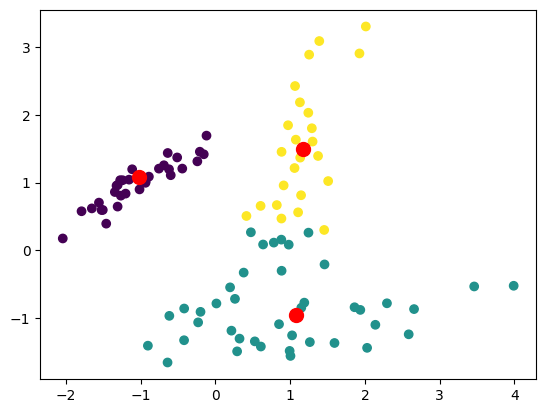

In [233]:
clustering3 = AffinityPropagation(preference=-47).fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)
plt.scatter(clustering3.cluster_centers_[:,0], clustering3.cluster_centers_[:,1], s=100, c='red')

In [234]:
# Внутренние метрики
print(silhouette_score(data3, clustering3.labels_))
print(calinski_harabasz_score(data3, clustering3.labels_))

# Внешние метрики
print(rand_score(clustering3.labels_, data3_y))
print(fowlkes_mallows_score(clustering3.labels_, data3_y))

0.5046918954110072
107.14284547216351
0.8945454545454545
0.8423050423284206


[-1  0  1  2  3]


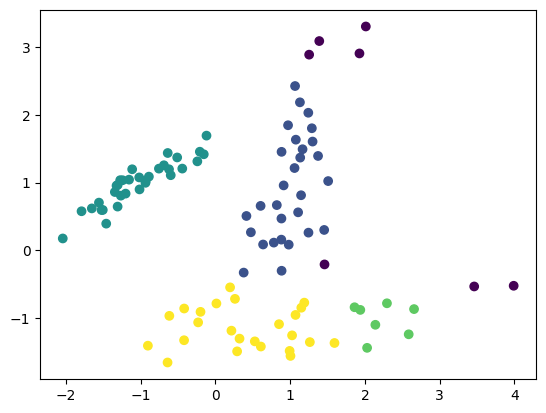

In [235]:
dbscan3 = DBSCAN().fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [236]:
# Внутренние метрики
print(silhouette_score(data3, dbscan3.labels_))
print(calinski_harabasz_score(data3, dbscan3.labels_))

# Внешние метрики
print(rand_score(dbscan3.labels_, data3_y))
print(fowlkes_mallows_score(dbscan3.labels_, data3_y))

0.46958918118478066
73.48922107871459
0.8923232323232323
0.8208913292054121


[-1  0]


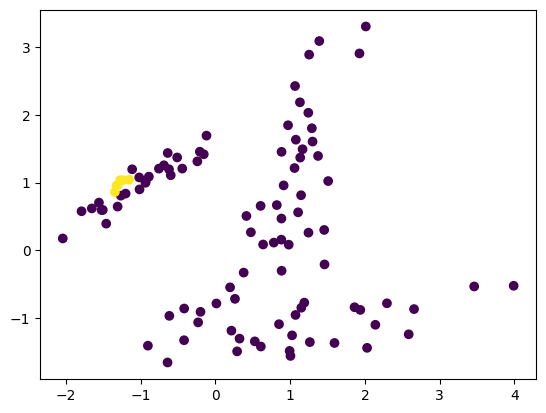

In [237]:
dbscan3 = DBSCAN(eps=0.1, min_samples=4).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [238]:
# Внутренние метрики
print(silhouette_score(data3, dbscan3.labels_))
print(calinski_harabasz_score(data3, dbscan3.labels_))

# Внешние метрики
print(rand_score(dbscan3.labels_, data3_y))
print(fowlkes_mallows_score(dbscan3.labels_, data3_y))

0.015206373484290863
6.854697321912354
0.3751515151515151
0.54635342469289


In [239]:
nbrs = NearestNeighbors(n_neighbors=4).fit(data3)
distances, indices = nbrs.kneighbors(data3)

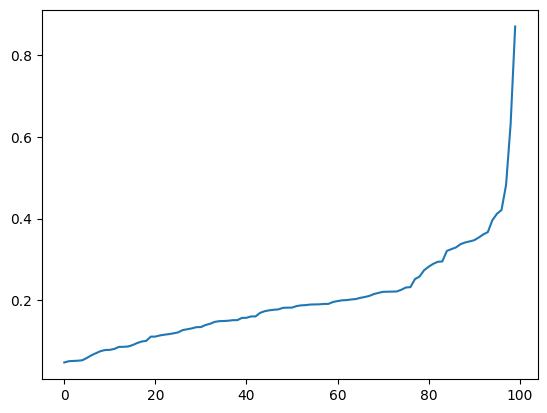

In [240]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6]


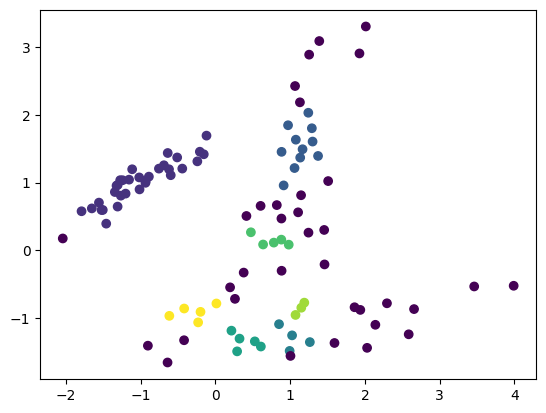

In [241]:
dbscan3 = DBSCAN(eps=0.3, min_samples=4).fit(data3)
print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

In [242]:
# Внутренние метрики
print(silhouette_score(data3, dbscan3.labels_))
print(calinski_harabasz_score(data3, dbscan3.labels_))

# Внешние метрики
print(rand_score(dbscan3.labels_, data3_y))
print(fowlkes_mallows_score(dbscan3.labels_, data3_y))

0.1930071228565776
16.894535624946915
0.7806060606060606
0.6198307283032216


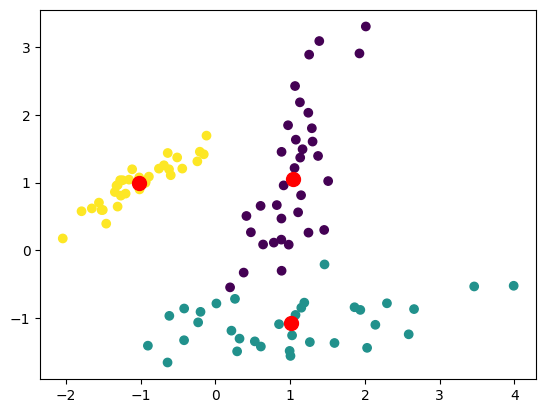

In [243]:
gm3 = GaussianMixture(n_components=3).fit(data3)

с = gm3.predict(data3)

plt.scatter(data3[:,0], data3[:,1], c=с)
plt.scatter(gm3.means_[:,0], gm3.means_[:,1], s=100, c='red')

In [244]:
# Внутренние метрики
print(silhouette_score(data3, с))
print(calinski_harabasz_score(data3, с))

# Внешние метрики
print(rand_score(с, data3_y))
print(fowlkes_mallows_score(с, data3_y))

0.47883705322031617
93.1599008163357
0.9490909090909091
0.9220779220779222


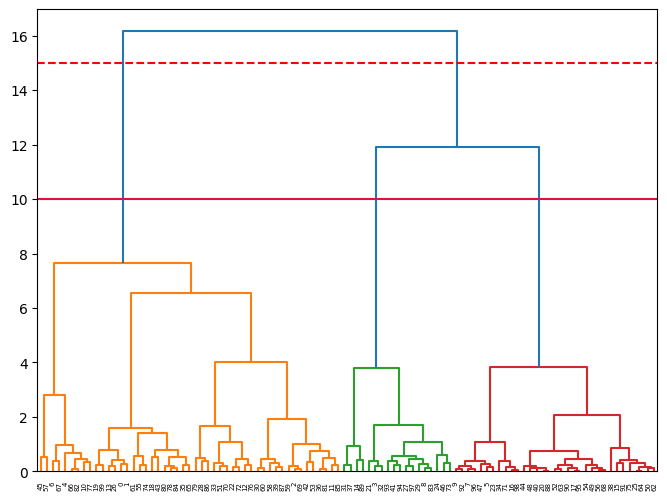

In [246]:
clusters3 = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters3)
plt.axhline(15, color='red', linestyle='--');
plt.axhline(10, color='crimson');

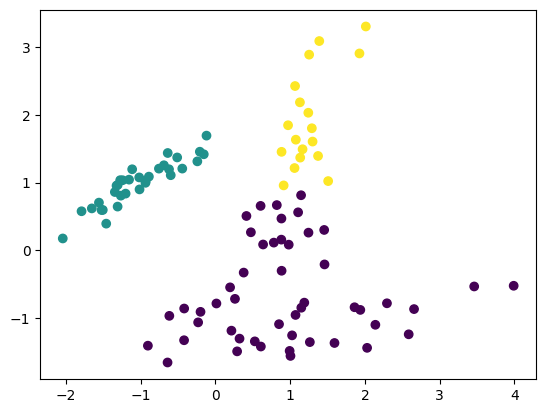

In [247]:
clustering3 = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)
plt.scatter(data3[:,0], data3[:,1], c=clustering3.labels_)

In [248]:
# Внутренние метрики
print(silhouette_score(data3, clustering3.labels_))
print(calinski_harabasz_score(data3, clustering3.labels_))

# Внешние метрики
print(rand_score(clustering3.labels_, data3_y))
print(fowlkes_mallows_score(clustering3.labels_, data3_y))

0.5070670946842759
103.46513554735814
0.8351515151515152
0.7669446444347338


In [276]:
som3 = SOM(m=4, n=4, dim=2)
som3.fit(data3)

In [277]:
predictions3 = som3.predict(data3)

In [278]:
# Внутренние метрики
print(silhouette_score(data3, predictions3))
print(calinski_harabasz_score(data3, predictions3))

# Внешние метрики
print(rand_score(predictions3, data3_y))
print(fowlkes_mallows_score(predictions3, data3_y))

0.27638628769953705
105.14684107432592
0.7563636363636363
0.5056351352746188


## Самостоятельно реализовать KMeans. Проверить на созданных датасетах

In [281]:
class Kmeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        centroids_idx = np.random.choice(range(X.shape[0]), size=self.n_clusters, replace=False)
        centroids = X[centroids_idx]
        return centroids

    def assign_clusters(self, X, centroids):
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distance_matrix[:, i] = np.linalg.norm(X - centroid, axis=1)
        cluster_labels = np.argmin(distance_matrix, axis=1)
        return cluster_labels

    def update_centroids(self, X, cluster_labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[cluster_labels == i], axis=0)
        return centroids

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            cluster_labels = self.assign_clusters(X, centroids)
            new_centroids = self.update_centroids(X, cluster_labels)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        return centroids, cluster_labels

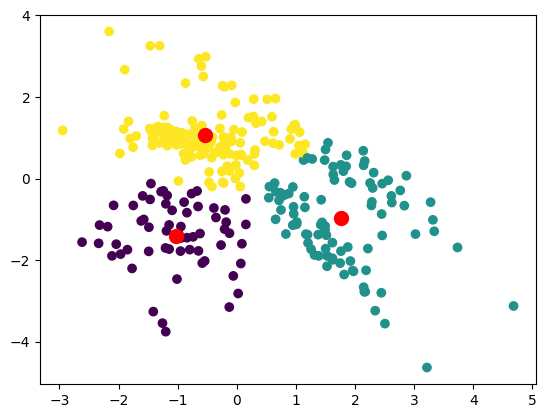

In [286]:
# Создание экземпляра KMeans и обучение на данных X
kmeans = KMeans(n_clusters=3)
centroids, cluster_labels = kmeans.fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

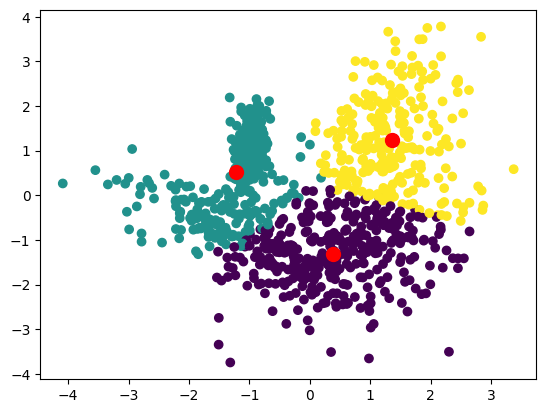

In [292]:
# Создание экземпляра KMeans и обучение на данных X
kmeans = KMeans(n_clusters=3)
centroids, cluster_labels = kmeans.fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

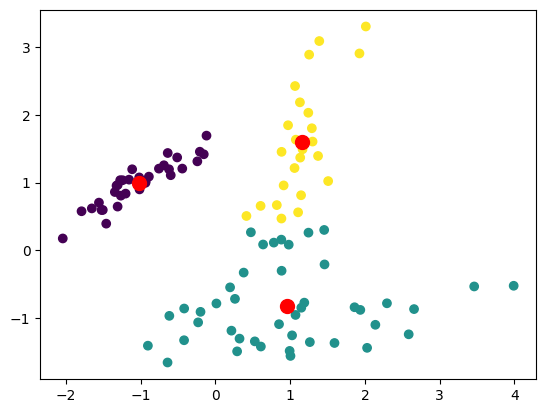

In [293]:
# Создание экземпляра KMeans и обучение на данных X
kmeans = KMeans(n_clusters=3)
centroids, cluster_labels = kmeans.fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

# Задание 2

## На основе датасета для задачи классификации построить модель кластеризации, используя три метода: k-means; иерархическая кластеризация; DBSCAN.Произвести визуализацию построенных моделей.Выполнить оценку качества полученных моделей кластеризации. Сравнить полученные результаты.

In [295]:
import pandas as pd

In [296]:
df = pd.read_csv('..\data\weatherAUS.csv')

In [297]:
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [298]:
df = df.rename (
    columns = {
        'Date' : 'date',
        'Location' : 'location',
        'MinTemp' : 'min_temp',
        'MaxTemp' : 'max_temp',
        'Rainfall' : 'rainfall',
        'Evaporation' : 'evaporation',
        'Sunshine' : 'sunshine',
        'WindGustDir' : 'wind_gust_dir',
        'WindGustSpeed' : 'wind_gust_speed',
        'WindDir9am' : 'wind_dir_9am',
        'WindDir3pm' : 'wind_dir_3pm',
        'WindSpeed9am' : 'wind_speed_9am',
        'WindSpeed3pm' : 'wind_speed_3pm',
        'Humidity9am' : 'humidity_9am',
        'Humidity3pm' : 'humidity_3pm',
        'Pressure9am' : 'pressure_9am',
        'Pressure3pm' : 'pressure_3pm',
        'Cloud9am' : 'cloud_9am',
        'Cloud3pm' : 'cloud_3pm',
        'Temp9am' : 'temp_9am',
        'Temp3pm' : 'temp_3pm',
        'RainToday' : 'rain_today',
        'RainTomorrow' : 'rain_tomorrow'
    }
)

In [299]:
df['location'] = pd.Categorical(df['location']).codes
df['wind_gust_dir'] = pd.Categorical(df['wind_gust_dir']).codes
df['wind_dir_9am'] = pd.Categorical(df['wind_dir_9am']).codes
df['wind_dir_3pm'] = pd.Categorical(df['wind_dir_3pm']).codes
df['rain_today'] = pd.Categorical(df['rain_today']).codes
df['rain_tomorrow'] = pd.Categorical(df['rain_tomorrow']).codes

In [300]:
df = df.drop(["date"], axis=1)

In [301]:
y = df["rain_tomorrow"]
X = df.drop(["rain_tomorrow"], axis=1)

In [333]:
from sklearn.preprocessing import StandardScaler

In [334]:
normalizer = StandardScaler()
X_normalized_zscore = normalizer.fit_transform(X)

In [337]:
from imblearn.under_sampling import RandomUnderSampler

# Создание экземпляра RandomUnderSampler
rus = RandomUnderSampler()

# Применение уменьшения выборки к данным
X, y = rus.fit_resample(X_normalized_zscore, y)


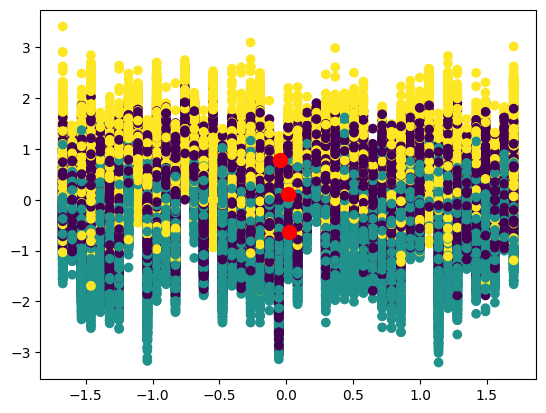

In [338]:
centroids, cluster_labels = Kmeans(n_clusters=3).fit(np.array(X))
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [339]:
# Внутренние метрики
print(silhouette_score(np.array(X), cluster_labels))
print(calinski_harabasz_score(np.array(X), cluster_labels))

# Внешние метрики
print(rand_score(cluster_labels, np.array(y)))
print(fowlkes_mallows_score(cluster_labels, np.array(y)))

0.12589908966687446
9816.819688371279
0.5507387591160026
0.47241332214390214


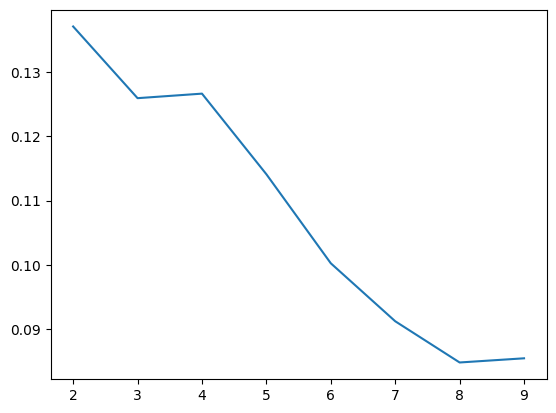

In [340]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(np.array(X), Kmeans(n_clusters=i).fit(np.array(X))[1]))

plt.plot(range(2,10), ss)

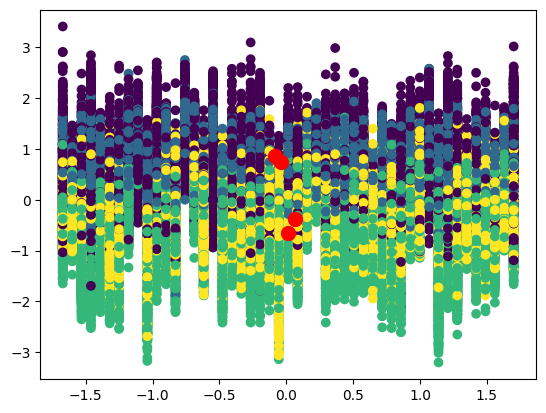

In [341]:
centroids, cluster_labels = Kmeans(n_clusters=4).fit(np.array(X))
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=cluster_labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')

In [342]:
# Внутренние метрики
print(silhouette_score(np.array(X), cluster_labels))
print(calinski_harabasz_score(np.array(X), cluster_labels))

# Внешние метрики
print(rand_score(cluster_labels, np.array(y)))
print(fowlkes_mallows_score(cluster_labels, np.array(y)))

0.1266553901766658
8202.887543977611
0.5395362141920756
0.42282443142280685


[-1  0  1  2  3]


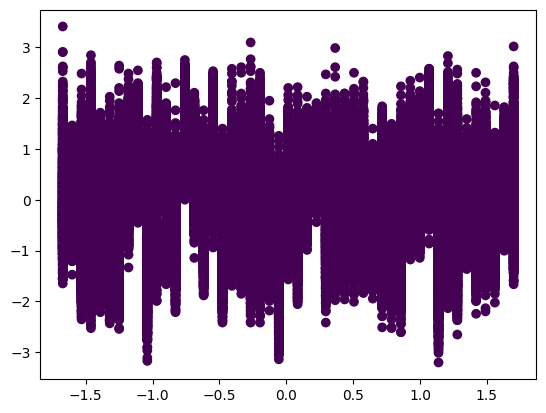

In [343]:
dbscan = DBSCAN().fit(X)

print(np.unique(dbscan.labels_))
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=dbscan.labels_)

In [344]:
# Внутренние метрики
print(silhouette_score(np.array(X), dbscan.labels_))
print(calinski_harabasz_score(np.array(X), dbscan.labels_))

# Внешние метрики
print(rand_score(dbscan.labels_, np.array(y)))
print(fowlkes_mallows_score(dbscan.labels_, np.array(y)))

-0.27845709481783265
4.681330525934327
0.49999359405981764
0.7057277433597705


[-1  0  1  2  3  4  5  6  7]


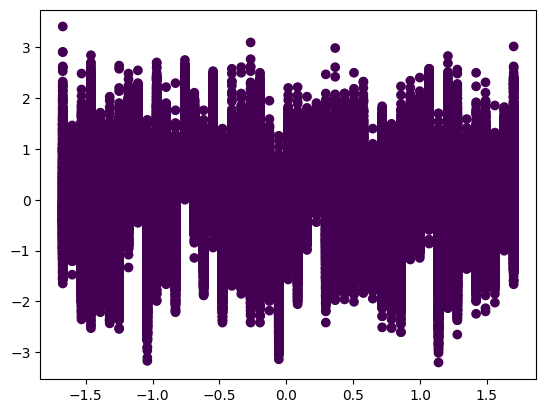

In [345]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(X)
print(np.unique(dbscan.labels_))
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=dbscan.labels_)

In [346]:
# Внутренние метрики
print(silhouette_score(np.array(X), dbscan.labels_))
print(calinski_harabasz_score(np.array(X), dbscan.labels_))

# Внешние метрики
print(rand_score(dbscan.labels_, np.array(y)))
print(fowlkes_mallows_score(dbscan.labels_, np.array(y)))

-0.2835942274484616
1.4676552782552565
0.4999930473762871
0.7062035791483786


In [360]:
nbrs = NearestNeighbors(n_neighbors=6).fit(X)
distances, indices = nbrs.kneighbors(X)

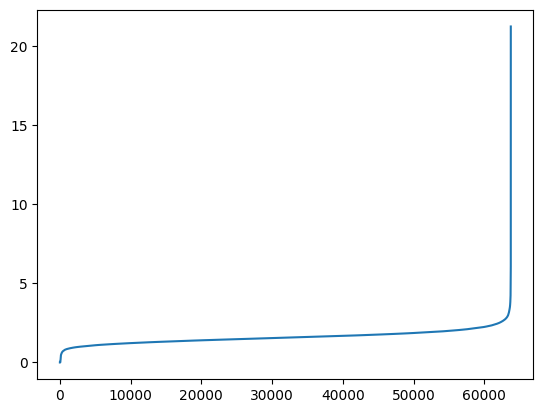

In [361]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
# distances
plt.plot(distances)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


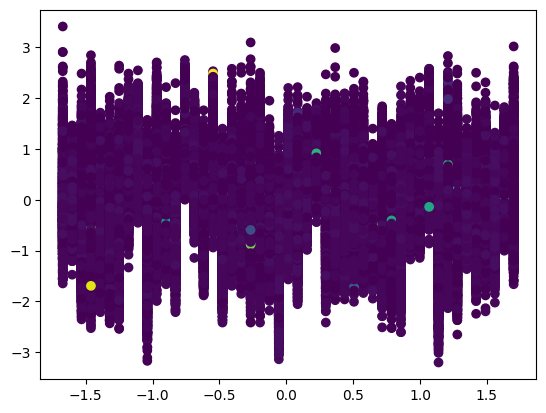

In [363]:
dbscan = DBSCAN(eps=2, min_samples=6).fit(X)
print(np.unique(dbscan.labels_))
plt.scatter(np.array(X)[:,0], np.array(X)[:,1], c=dbscan.labels_)

In [364]:
# Внутренние метрики
print(silhouette_score(np.array(X), dbscan.labels_))
print(calinski_harabasz_score(np.array(X), dbscan.labels_))

# Внешние метрики
print(rand_score(dbscan.labels_, np.array(y)))
print(fowlkes_mallows_score(dbscan.labels_, np.array(y)))

-0.33889809018153366
96.39641031478423
0.532353826427795
0.47787563595033955


In [367]:
import random

In [373]:
# Генерация случайной подвыборки из большого набора данных X
sample_size = min(1000, X.shape[0])  # Определение размера подвыборки, например, до 1000 точек данных
random_indices = random.sample(range(X.shape[0]), sample_size)
X_subset = X[random_indices]
y_subset = y[random_indices]

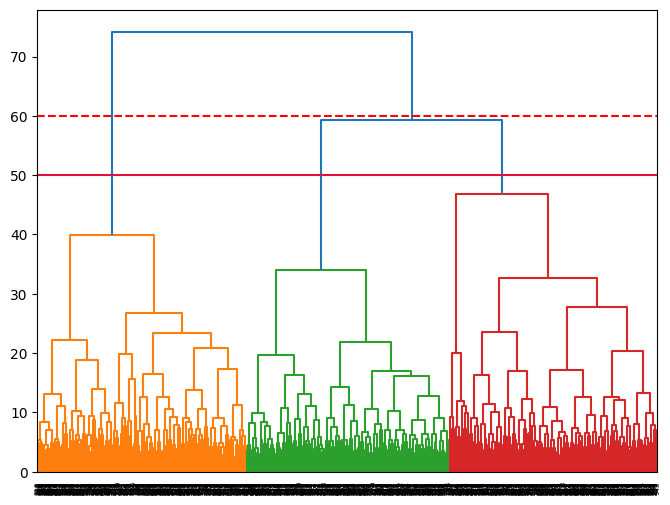

In [374]:
clusters = hierarchy.linkage(X_subset, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(60, color='red', linestyle='--');
plt.axhline(50, color='crimson');

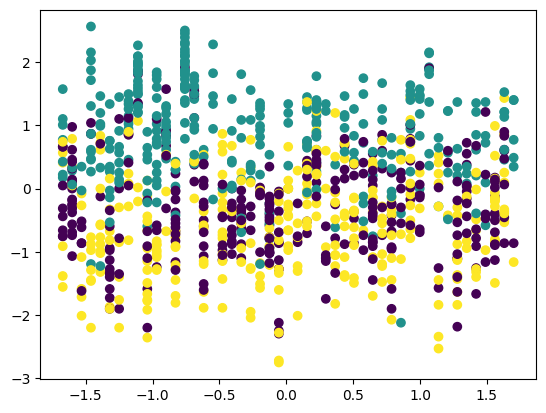

In [375]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X_subset)
plt.scatter(np.array(X_subset)[:,0], np.array(X_subset)[:,1], c=clustering.labels_)

In [376]:
# Внутренние метрики
print(silhouette_score(np.array(X_subset), clustering.labels_))
print(calinski_harabasz_score(np.array(X_subset), clustering.labels_))

# Внешние метрики
print(rand_score(clustering.labels_, np.array(y_subset)))
print(fowlkes_mallows_score(clustering.labels_, np.array(y_subset)))

0.08507587437071443
126.84937020987424
0.5434414414414415
0.4607551969184111


На основе метрик можем сделать вывод, что Kmeans показывает самый лучший результат.

# Задание 3

## Реализовать DBSCAN

In [377]:
class Dbscan:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def region_query(self, X, point):
        return [i for i, p in enumerate(X) if np.linalg.norm(p - point) <= self.eps]

    def expand_cluster(self, X, labels, point_idx, neighbors, cluster):
        labels[point_idx] = cluster
        i = 0
        while i < len(neighbors):
            neighbor = neighbors[i]
            if labels[neighbor] == -1:
                labels[neighbor] = cluster
            elif labels[neighbor] == 0:
                labels[neighbor] = cluster
                new_neighbors = self.region_query(X, X[neighbor])
                if len(new_neighbors) >= self.min_samples:
                    neighbors += new_neighbors
            i += 1

    def fit(self, X):
        labels = np.zeros(len(X))
        cluster = 0
        for i, point in enumerate(X):
            if labels[i] != 0:
                continue
            neighbors = self.region_query(X, point)
            if len(neighbors) < self.min_samples:
                labels[i] = -1
            else:
                cluster += 1
                self.expand_cluster(X, labels, i, neighbors, cluster)
        return labels

In [378]:
dbscan = Dbscan(eps=0.5, min_samples=5)
labels = dbscan.fit(data1)

In [379]:
# Внутренние метрики
print(silhouette_score(data1, labels))
print(calinski_harabasz_score(data1, labels))

# Внешние метрики
print(rand_score(labels, data1_y))
print(fowlkes_mallows_score(labels, data1_y))

0.3877833456312088
6.085276774216518
0.4984169453734671
0.6645593309404122


In [380]:
dbscan = Dbscan(eps=0.5, min_samples=5)
labels = dbscan.fit(data2)

In [381]:
# Внутренние метрики
print(silhouette_score(data2, labels))
print(calinski_harabasz_score(data2, labels))

# Внешние метрики
print(rand_score(labels, data2_y))
print(fowlkes_mallows_score(labels, data2_y))

-0.35429855459261433
7.984594309950216
0.5438698698698698
0.4614581876251503


In [382]:
dbscan = Dbscan(eps=0.5, min_samples=5)
labels = dbscan.fit(data3)

In [383]:
# Внутренние метрики
print(silhouette_score(data3, labels))
print(calinski_harabasz_score(data3, labels))

# Внешние метрики
print(rand_score(labels, data3_y))
print(fowlkes_mallows_score(labels, data3_y))

0.46958918118478066
73.48922107871459
0.8923232323232323
0.8208913292054121
